In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Resources/prices.csv")

In [3]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.set_index('symbol', inplace=True)
df = df.sort_values('date')
tickers = df.index.unique()
tickers

Index(['SYMC', 'IFF', 'ILMN', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'IDXX',
       ...
       'NAVI', 'QRVO', 'CFG', 'WRK', 'KHC', 'PYPL', 'HPE', 'CSRA', 'WLTW',
       'FTV'],
      dtype='object', name='symbol', length=501)

In [25]:
sample_num = random.sample(range(0, 501), 50)

In [28]:
test_tickers = []
for num in sample_num:
    test_tickers.append(tickers[num])

In [70]:
model_sixty_day = Sequential()
model_sixty_day.add(LSTM(units=50, return_sequences=True, input_shape=(60,4)))
model_sixty_day.add(LSTM(units=50))
model_sixty_day.add(Dense(1))
model_sixty_day.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
model_thirty_day = Sequential()
model_thirty_day.add(LSTM(units=50, return_sequences=True, input_shape=(30,4)))
model_thirty_day.add(LSTM(units=50))
model_thirty_day.add(Dense(1))
model_thirty_day.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
model_ten_day = Sequential()
model_ten_day.add(LSTM(units=50, return_sequences=True, input_shape=(10,4)))
model_ten_day.add(LSTM(units=50))
model_ten_day.add(Dense(1))
model_ten_day.compile(loss='mean_squared_error', optimizer='adam')

In [29]:
test_tickers

['JWN',
 'AMT',
 'AMGN',
 'SLG',
 'NVDA',
 'BCR',
 'GOOGL',
 'ARNC',
 'NTAP',
 'BBBY',
 'CSCO',
 'NWS',
 'RHT',
 'EMN',
 'TXT',
 'SPLS',
 'EMR',
 'VRSN',
 'MTD',
 'PRU',
 'LEG',
 'MMC',
 'ZBH',
 'PNC',
 'CPB',
 'DLTR',
 'AES',
 'ETN',
 'CL',
 'VFC',
 'TWX',
 'RHI',
 'COO',
 'ICE',
 'LRCX',
 'COF',
 'UAL',
 'JEC',
 'SRE',
 'ED',
 'SWKS',
 'URBN',
 'FAST',
 'KSS',
 'MTB',
 'SO',
 'GRMN',
 'FTV',
 'NBL',
 'GM']

In [72]:
for stock in test_tickers:
    train_df = df.loc[stock, :]
    train_df.set_index('date', inplace=True)
    train_df.drop('open', axis=1, inplace=True)
    train_dataset = train_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(train_dataset)
    X_train_sixty, y_train_sixty = [], []
    for i in range(61,len(train_df)):
        X_train_sixty.append(scaled_data[i-61:i-1,0:4])
        y_train_sixty.append(scaled_data[i,0])
    X_train_sixty, y_train_sixty = np.array(X_train_sixty), np.array(y_train_sixty)
    model_sixty_day.fit(X_train_sixty, y_train_sixty, epochs=1, batch_size=1, verbose=2)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Epoch 1/1
 - 118s - loss: 0.0029
Epoch 1/1
 - 100s - loss: 8.0991e-04
Epoch 1/1
 - 57s - loss: 0.0011
Epoch 1/1
 - 59s - loss: 8.0219e-04
Epoch 1/1
 - 58s - loss: 2.3368e-04
Epoch 1/1
 - 62s - loss: 4.8078e-04
Epoch 1/1
 - 60s - loss: 0.0016
Epoch 1/1
 - 59s - loss: 0.0016
Epoch 1/1
 - 58s - loss: 0.0011
Epoch 1/1
 - 58s - loss: 0.0013
Epoch 1/1
 - 59s - loss: 0.0011
Epoch 1/1
 - 28s - loss: 0.0024
Epoch 1/1
 - 59s - loss: 0.0010
Epoch 1/1
 - 60s - loss: 0.0011
Epoch 1/1
 - 60s - loss: 7.9681e-04
Epoch 1/1
 - 60s - loss: 6.5580e-04
Epoch 1/1
 - 60s - loss: 0.0016
Epoch 1/1
 - 61s - loss: 3.8555e-04
Epoch 1/1
 - 61s - loss: 3.0421e-04
Epoch 1/1
 - 60s - loss: 9.2859e-04
Epoch 1/1
 - 58s - loss: 4.3844e-04
Epoch 1/1
 - 58s - loss: 2.5813e-04
Epoch 1/1
 - 60s - loss: 5.3680e-04
Epoch 1/1
 - 60s - loss: 4.7772e-04
Epoch 1/1
 - 59s - loss: 4.3422e-04
Epoch 1/1
 - 60s - loss: 0.0014
Epoch 1/1
 - 59s - loss: 0.0018
Epoch 1/1
 - 60s - loss: 0.0012
Epoch 1/1
 - 62s - loss: 0.0014
Epoch 1/1
 - 6

In [82]:
for stock in test_tickers:
    train_df = df.loc[stock, :]
    train_df.set_index('date', inplace=True)
    train_df.drop('open', axis=1, inplace=True)
    train_dataset = train_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(train_dataset)
    X_train_thirty, y_train_thirty = [], []
    for i in range(31,len(train_df)):
        X_train_thirty.append(scaled_data[i-31:i-1,0:4])
        y_train_thirty.append(scaled_data[i,0])
    X_train_thirty, y_train_thirty = np.array(X_train_thirty), np.array(y_train_thirty)
    model_thirty_day.fit(X_train_thirty, y_train_thirty, epochs=1, batch_size=1, verbose=2)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Epoch 1/1
 - 28s - loss: 7.4166e-04
Epoch 1/1
 - 29s - loss: 3.7768e-04
Epoch 1/1
 - 30s - loss: 4.8039e-04
Epoch 1/1
 - 30s - loss: 5.5485e-04
Epoch 1/1
 - 29s - loss: 1.3449e-04
Epoch 1/1
 - 30s - loss: 2.7998e-04
Epoch 1/1
 - 29s - loss: 0.0012
Epoch 1/1
 - 31s - loss: 0.0013
Epoch 1/1
 - 31s - loss: 8.8023e-04
Epoch 1/1
 - 30s - loss: 0.0011
Epoch 1/1
 - 30s - loss: 9.1617e-04
Epoch 1/1
 - 15s - loss: 0.0021
Epoch 1/1
 - 31s - loss: 8.4682e-04
Epoch 1/1
 - 30s - loss: 9.2142e-04
Epoch 1/1
 - 30s - loss: 6.9048e-04
Epoch 1/1
 - 30s - loss: 6.1878e-04
Epoch 1/1
 - 31s - loss: 0.0015
Epoch 1/1
 - 30s - loss: 3.2140e-04
Epoch 1/1
 - 30s - loss: 2.6733e-04
Epoch 1/1
 - 30s - loss: 8.3613e-04
Epoch 1/1
 - 31s - loss: 3.7787e-04
Epoch 1/1
 - 32s - loss: 2.2120e-04
Epoch 1/1
 - 31s - loss: 4.6568e-04
Epoch 1/1
 - 30s - loss: 4.4015e-04
Epoch 1/1
 - 30s - loss: 3.8791e-04
Epoch 1/1
 - 30s - loss: 0.0013
Epoch 1/1
 - 30s - loss: 0.0018
Epoch 1/1
 - 31s - loss: 0.0010
Epoch 1/1
 - 30s - loss:

In [30]:
for stock in test_tickers:
    train_df = df.loc[stock, :]
    train_df.set_index('date', inplace=True)
    train_df.drop('open', axis=1, inplace=True)
    train_dataset = train_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(train_dataset)
    X_train_ten, y_train_ten = [], []
    for i in range(11,len(train_df)):
        X_train_ten.append(scaled_data[i-11:i-1,0:4])
        y_train_ten.append(scaled_data[i,0])
    X_train_ten, y_train_ten = np.array(X_train_ten), np.array(y_train_ten)
    model_ten_day.fit(X_train_ten, y_train_ten, epochs=1, batch_size=1, verbose=2)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Epoch 1/1
 - 26s - loss: 0.0036
Epoch 1/1
 - 23s - loss: 9.4789e-04
Epoch 1/1
 - 23s - loss: 0.0012
Epoch 1/1
 - 23s - loss: 8.1741e-04
Epoch 1/1
 - 23s - loss: 2.2059e-04
Epoch 1/1
 - 23s - loss: 4.6631e-04
Epoch 1/1
 - 23s - loss: 0.0014
Epoch 1/1
 - 23s - loss: 0.0015
Epoch 1/1
 - 23s - loss: 0.0011
Epoch 1/1
 - 23s - loss: 0.0012
Epoch 1/1
 - 23s - loss: 0.0010
Epoch 1/1
 - 12s - loss: 0.0024
Epoch 1/1
 - 23s - loss: 9.6085e-04
Epoch 1/1
 - 23s - loss: 0.0010
Epoch 1/1
 - 25s - loss: 7.7870e-04
Epoch 1/1
 - 23s - loss: 6.8925e-04
Epoch 1/1
 - 23s - loss: 0.0016
Epoch 1/1
 - 23s - loss: 3.9183e-04
Epoch 1/1
 - 23s - loss: 3.0199e-04
Epoch 1/1
 - 23s - loss: 9.5455e-04
Epoch 1/1
 - 23s - loss: 4.2107e-04
Epoch 1/1
 - 23s - loss: 2.6529e-04
Epoch 1/1
 - 23s - loss: 5.1706e-04
Epoch 1/1
 - 23s - loss: 4.8111e-04
Epoch 1/1
 - 23s - loss: 4.2171e-04
Epoch 1/1
 - 23s - loss: 0.0013
Epoch 1/1
 - 24s - loss: 0.0019
Epoch 1/1
 - 24s - loss: 0.0011
Epoch 1/1
 - 23s - loss: 0.0014
Epoch 1/1
 -

In [73]:
MSFT_df = df.loc['MSFT', :]
MSFT_df.set_index('date', inplace=True)
MSFT_df.drop('open', axis=1, inplace=True)
dataset = MSFT_df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
X_test, y_test = [], []
for i in range(61,len(MSFT_df)):
    X_test.append(scaled_data[i-61:i-1,0:4])
    y_test.append(scaled_data[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
closing_price = model_sixty_day.predict(X_test)

In [75]:
final = []
for price in closing_price:
    final.append(np.pad(price, (0, 3), 'constant'))
final_price = scaler.inverse_transform(final)
close = []
for price in final_price:
    close.append(price[0])

In [76]:
close

[29.87587223729497,
 29.483904984023244,
 29.313749173029123,
 29.365608130056053,
 29.446592289558023,
 29.463441700273066,
 29.91916367683506,
 30.283993599855528,
 30.280554006029053,
 30.40023722689569,
 30.85057712261802,
 30.87027369887732,
 30.758365872288717,
 31.095980402495712,
 31.404018903802484,
 31.387623345193326,
 31.408840628575415,
 31.087107896393714,
 31.170475687155797,
 30.999440613348543,
 31.003011521717653,
 31.122544668821273,
 30.736118042058198,
 30.99139835403225,
 30.28932908521232,
 29.999085217273116,
 29.239831793383868,
 28.54779205096787,
 29.1386911541553,
 29.090303863170327,
 29.47170846509774,
 29.316364571431308,
 28.9974354349917,
 28.978290742893158,
 28.746441302305637,
 28.42063418848537,
 27.49665060424383,
 27.231089029231114,
 26.678975521876545,
 26.453971381318063,
 25.803168641242845,
 26.368406946363493,
 26.022151677196575,
 26.090406192832663,
 26.457086622172863,
 26.80438333063875,
 26.006681976883424,
 25.59621752718422,
 25.44188

In [77]:
len(close)

1701

In [78]:
valid = MSFT_df[61:]
len(valid)

1701

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


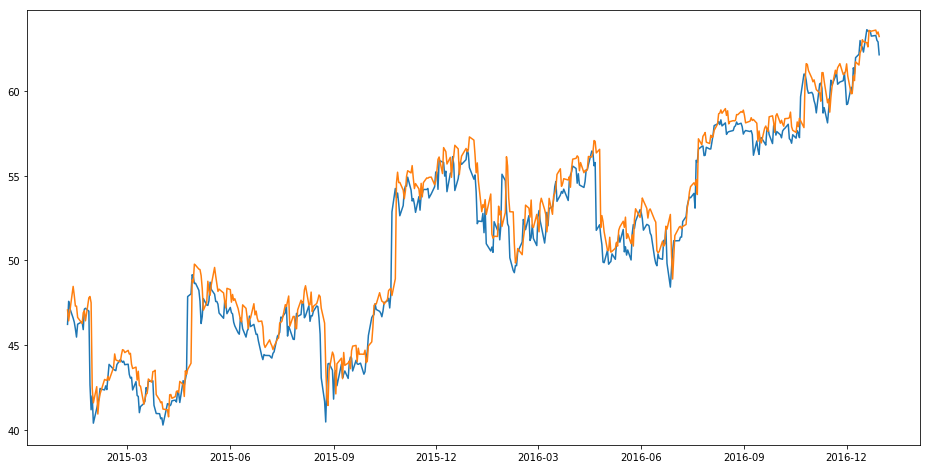

In [79]:
valid['predictions'] = close
plt.figure(figsize=(16,8))

valid = valid[1200:]
#plt.plot(train['close'])
plt.plot(valid[['close','predictions']])

In [65]:
valid['error'] = valid['close'] - valid['predictions']

In [66]:
valid['error'].mean()

0.28135177439471937

In [80]:
model_sixty_day.save('model_sixty_day.h5')

In [83]:
model_thirty_day.save('model_thirty_day.h5')

In [84]:
model_ten_day.save('model_ten_day.h5')